## **Importing library **

In [ ]:

import random

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter)
#will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved
# as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be
#saved outside of the current session

## **Importing DATA**

In [ ]:
# store the dataset into a pandas dataframe
df = pd.read_csv("Dataset.csv")

# print a sample of 10 rows
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
46310,540352,84968C,SET OF 16 VINTAGE PISTACHIO CUTLERY,5,2011-01-06 14:27:00,8.47,NaN,United Kingdom
48311,540468,21519,GIN & TONIC DIET GREETING CARD,1,2011-01-07 13:55:00,0.85,NaN,United Kingdom
43024,540026,22933,BAKING MOULD EASTER EGG MILK CHOC,1,2011-01-04 13:25:00,5.91,NaN,United Kingdom
3571,536637,22867,HAND WARMER BIRD DESIGN,1,2010-12-02 11:35:00,2.10,18041.0,United Kingdom
57423,541206,22417,PACK OF 60 SPACEBOY CAKE CASES,120,2011-01-14 12:24:00,0.42,14646.0,Netherlands
7855,537058,22941,CHRISTMAS LIGHTS 10 REINDEER,2,2010-12-05 11:51:00,8.50,13269.0,United Kingdom
20778,538071,21356,TOAST ITS - FAIRY FLOWER,1,2010-12-09 14:09:00,2.51,NaN,United Kingdom
68497,541869,22983,CARD BILLBOARD FONT,1,2011-01-24 09:35:00,0.83,NaN,United Kingdom
20069,538008,22630,DOLLY GIRL LUNCH BOX,12,2010-12-09 12:17:00,1.95,12683.0,France
31885,539019,22508,DOORSTOP RETROSPOT HEART,2,2010-12-15 14:12:00,3.75,17551.0,United Kingdom


Invoice Number (InvoiceNo): A unique code for each transaction. If it starts with 'c', i guess it means the transaction was canceled.

Product Code (StockCode): A unique code for each product item.

Product Description (Description): The name of the product.

Quantity: The number of each product sold in a transaction.

Invoice Date (InvoiceDate): The date and time when the transaction occurred.

Unit Price (UnitPrice): The price of one unit of the product in currency.

Customer ID (CustomerID): A unique code for each customer.

Country: The country where the customer resides.

In [ ]:
df.shape

(71556, 8)

In [ ]:
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71556 entries, 0 to 71555
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    71556 non-null  object 
 1   StockCode    71556 non-null  object 
 2   Description  71386 non-null  object 
 3   Quantity     71556 non-null  int64  
 4   InvoiceDate  71556 non-null  object 
 5   UnitPrice    71555 non-null  float64
 6   CustomerID   43935 non-null  float64
 7   Country      71555 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 4.4+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,71556.000000,71555.000000,43935.000000
mean,8.335975,5.703888,15366.884830
std,395.939689,139.527495,1763.483841
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13982.500000
50%,2.000000,2.510000,15311.000000
75%,8.000000,4.210000,17017.000000
max,74215.000000,16888.020000,18283.000000


In [ ]:
print(df.isnull().sum())


InvoiceNo          0
StockCode          0
Description      170
Quantity           0
InvoiceDate        0
UnitPrice          1
CustomerID     27621
Country            1
dtype: int64


In [ ]:
print(df.duplicated(keep=False).sum())

1309


In [ ]:
print(df.nunique())

InvoiceNo      3138
StockCode      2992
Description    2931
Quantity        249
InvoiceDate    2812
UnitPrice       450
CustomerID     1286
Country          27
dtype: int64


Size of Dataset: The dataset contains 541,909 rows (transactions) and 8 columns (attributes).

Invoice Date: The 'InvoiceDate' column is currently stored as an object (text), not in a proper date and time format.

Customer ID Type: The 'CustomerID' column is stored as float numbers, which seems weird for identifying customers.

Diverse Countries: The dataset includes transactions from customers in 38 different countries, which is quite fascinating!

Missing Customer IDs: There are missing values in the 'CustomerID' field, which is unexpected. Every transaction should ideally have a customer ID associated with it.

In [ ]:
# Display rows with missing values in the 'Description' column
rows_with_missing_description = df[df['Description'].isnull()]
rows_with_missing_description

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
64321,541601,22632,NaN,-84,2011-01-19 16:48:00,0.0,NaN,United Kingdom
65876,541697,21632,NaN,8,2011-01-20 18:09:00,0.0,NaN,United Kingdom
65943,541702,22451,NaN,-30,2011-01-21 09:44:00,0.0,NaN,United Kingdom
66518,541802,20854,NaN,-80,2011-01-21 14:45:00,0.0,NaN,United Kingdom


In [ ]:
# Display rows with missing values in 'Description' and 'CustomerID', and where 'UnitPrice' is 0.0
rows_with_missing_and_zero_price = df[df['Description'].isnull() & df['CustomerID'].isnull() & (df['UnitPrice'] == 0.0)]

rows_with_missing_and_zero_price

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
64321,541601,22632,NaN,-84,2011-01-19 16:48:00,0.0,NaN,United Kingdom
65876,541697,21632,NaN,8,2011-01-20 18:09:00,0.0,NaN,United Kingdom
65943,541702,22451,NaN,-30,2011-01-21 09:44:00,0.0,NaN,United Kingdom
66518,541802,20854,NaN,-80,2011-01-21 14:45:00,0.0,NaN,United Kingdom


In [ ]:
# drop rows with missing values
df = df.dropna()

In [ ]:
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
print(df.duplicated(keep=False).sum())
df2 = df.drop_duplicates()

1291


In [ ]:
print(df2.isnull().sum())
print(df2.duplicated(keep=False).sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
0


In [ ]:
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
71550,542147,35241,ENAMEL BLUE RIM BISCUIT BIN,6,2011-01-26 10:02:00,4.95,12782.0,Portugal
71551,542147,22923,FRIDGE MAGNETS LES ENFANTS ASSORTED,12,2011-01-26 10:02:00,0.85,12782.0,Portugal
71552,542147,22957,SET 3 PAPER VINTAGE CHICK PAPER EGG,12,2011-01-26 10:02:00,2.95,12782.0,Portugal
71553,542147,84581,DOG TOY WITH PINK CROCHET SKIRT,4,2011-01-26 10:02:00,3.75,12782.0,Portugal


In [ ]:
df2.describe()

,Quantity,UnitPrice,CustomerID
count,43257.000000,43257.000000,43257.000000
mean,12.022216,3.233724,15357.316018
std,508.865258,8.033243,1765.318512
min,-74215.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,4.000000,1.950000,15311.000000
75%,12.000000,3.750000,17001.000000
max,74215.000000,1126.000000,18283.000000


In [ ]:
# Count occurrences where 'UnitPrice' column is equal to 0.0
zero_unit_price_count = (df2['UnitPrice'] == 0.0).sum()
print("Number of occurrences where UnitPrice is 0.0:", zero_unit_price_count)

Number of occurrences where UnitPrice is 0.0: 6


In [ ]:
# Drop those 40 columns
df2 = df2[df2.UnitPrice != 0.0]

In [ ]:
zero_unit_price_count

6

In [ ]:
# Identify canceled orders based on 'InvoiceNo' starting with 'C' and negative 'Quantity'
canceled_orders = df2[df2['InvoiceNo'].str.startswith('C') & (df2['Quantity'] < 0)]

# Print the first few rows of canceled orders
print("Canceled Orders:")
canceled_orders

Canceled Orders:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
71520,C542138,20854,BLUE PATCH PURSE PINK HEART,-14,2011-01-25 17:21:00,1.65,17368.0,United Kingdom
71521,C542138,20723,STRAWBERRY CHARLOTTE BAG,-10,2011-01-25 17:21:00,0.85,17368.0,United Kingdom
71522,C542138,16237,SLEEPING CAT ERASERS,-60,2011-01-25 17:21:00,0.21,17368.0,United Kingdom
71523,C542139,22442,GROW YOUR OWN FLOWERS SET OF 3,-4,2011-01-25 17:24:00,7.95,17094.0,United Kingdom


In [ ]:

# Drop canceled orders from the original DataFrame
df3 = df2[~df2['InvoiceNo'].str.startswith('C') | (df2['Quantity'] >= 0)]

# Print the first few rows of the DataFrame after dropping canceled orders
print("DataFrame after dropping canceled orders:")
print(df3.head())


DataFrame after dropping canceled orders:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [ ]:
df3.nunique()

InvoiceNo      2172
StockCode      2598
Description    2611
Quantity        129
InvoiceDate    2031
UnitPrice       162
CustomerID     1218
Country          24
dtype: int64

In [ ]:
df3.describe()

,Quantity,UnitPrice,CustomerID
count,42089.000000,42089.000000,42089.000000
mean,14.581007,3.140616,15366.856400
std,364.827338,5.269604,1767.218251
min,1.000000,0.070000,12346.000000
25%,2.000000,1.250000,13982.000000
50%,5.000000,1.950000,15311.000000
75%,12.000000,3.750000,17018.000000
max,74215.000000,295.000000,18283.000000


# **Making corrections of the data types**

In [ ]:
# Convert 'InvoiceDate' to datetime
df3['InvoiceDate'] = pd.to_datetime(df3['InvoiceDate'])

# Convert CustomerID and InvoiceNo to integers
df3['CustomerID'] = df3['CustomerID'].astype(int)
df3['InvoiceNo'] = df3['InvoiceNo'].astype(int)

<ipython-input-25-af7264e19a4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['InvoiceDate'] = pd.to_datetime(df3['InvoiceDate'])
<ipython-input-25-af7264e19a4e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['CustomerID'] = df3['CustomerID'].astype(int)
<ipython-input-25-af7264e19a4e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
print("-"*30)
print(df3.info())


------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 42089 entries, 0 to 71554
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    42089 non-null  int64         
 1   StockCode    42089 non-null  object        
 2   Description  42089 non-null  object        
 3   Quantity     42089 non-null  int64         
 4   InvoiceDate  42089 non-null  datetime64[ns]
 5   UnitPrice    42089 non-null  float64       
 6   CustomerID   42089 non-null  int64         
 7   Country      42089 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 2.9+ MB
None


In [ ]:
# Step 1: Create a dictionary mapping StockCode to Description
stockcode_to_description = df3.groupby('StockCode')['Description'].apply(lambda x: x.value_counts().idxmax()).to_dict()

# Step 2: Find Duplicate StockCodes and Their Most Common Descriptions
duplicates_df = df3[df3.duplicated(subset=['StockCode'], keep=False)]
stockcode_to_common_description = duplicates_df.groupby('StockCode')['Description'].apply(lambda x: x.value_counts().idxmax())

# Step 3: Update the 'Description' Column in the Original DataFrame df3
df3['Description'] = df3['StockCode'].map(stockcode_to_description)


<ipython-input-27-7e5bc84132c0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Description'] = df3['StockCode'].map(stockcode_to_description)


In [ ]:
df3.head(50
    )

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED RETROSPOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


# **Exploring the Data (Understanding)**

In [ ]:
# Display the start, end, and period of the InvoiceDate
start_date = df3.InvoiceDate.min()
end_date = df3.InvoiceDate.max()
period = end_date - start_date

print("Start:", start_date)
print("End:", end_date)
print("Period:", period)


Start: 2010-12-01 08:26:00
End: 2011-01-26 10:02:00
Period: 56 days 01:36:00


In [ ]:
df3["Country"].nunique()

24

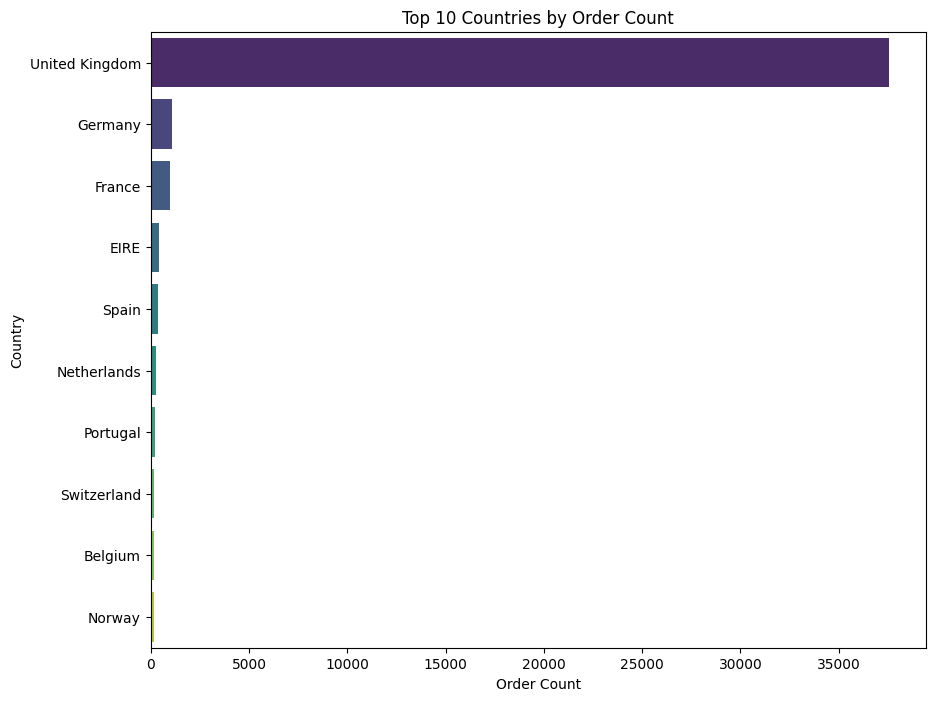

In [ ]:

# Group by country and calculate the order count
order_count_by_country = df3.groupby('Country')['InvoiceNo'].count().reset_index().sort_values(by='InvoiceNo', ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))  # Set the figure size

sns.barplot(x='InvoiceNo', y='Country', data=order_count_by_country.head(10), palette='viridis')
plt.xlabel('Order Count')
plt.ylabel('Country')
plt.title('Top 10 Countries by Order Count')

plt.show()


In [ ]:
df3["Revenue"] = df3["UnitPrice"] * df3["Quantity"]
df3.sample(10)


<ipython-input-32-f5f7e37fbcae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Revenue"] = df3["UnitPrice"] * df3["Quantity"]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
53206,540826,22988,SOLDIERS EGG CUP,12,2011-01-11 14:00:00,1.25,13102,United Kingdom,15.00
51072,540640,82484,WOOD BLACK BOARD ANT WHITE FINISH,1,2011-01-10 12:36:00,6.45,14527,United Kingdom,6.45
23292,538197,22725,ALARM CLOCK BAKELIKE CHOCOLATE,2,2010-12-10 10:56:00,3.75,14419,United Kingdom,7.50
69412,541970,22472,TV DINNER TRAY DOLLY GIRL,3,2011-01-24 13:48:00,4.95,15179,United Kingdom,14.85
14234,537467,22570,FELTCRAFT CUSHION RABBIT,2,2010-12-07 10:36:00,3.75,16059,United Kingdom,7.50
46008,540349,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-01-06 14:07:00,0.55,15379,United Kingdom,13.20
49062,540499,21754,HOME BUILDING BLOCK WORD,2,2011-01-09 10:21:00,5.95,16923,United Kingdom,11.90
22405,538168,21658,GLASS BEURRE DISH,2,2010-12-09 19:23:00,3.95,14702,United Kingdom,7.90
25470,538370,22844,VINTAGE CREAM DOG FOOD CONTAINER,1,2010-12-12 11:06:00,8.50,16923,United Kingdom,8.50
59470,541289,21042,RED RETROSPOT APRON,1,2011-01-17 13:23:00,5.95,14606,United Kingdom,5.95


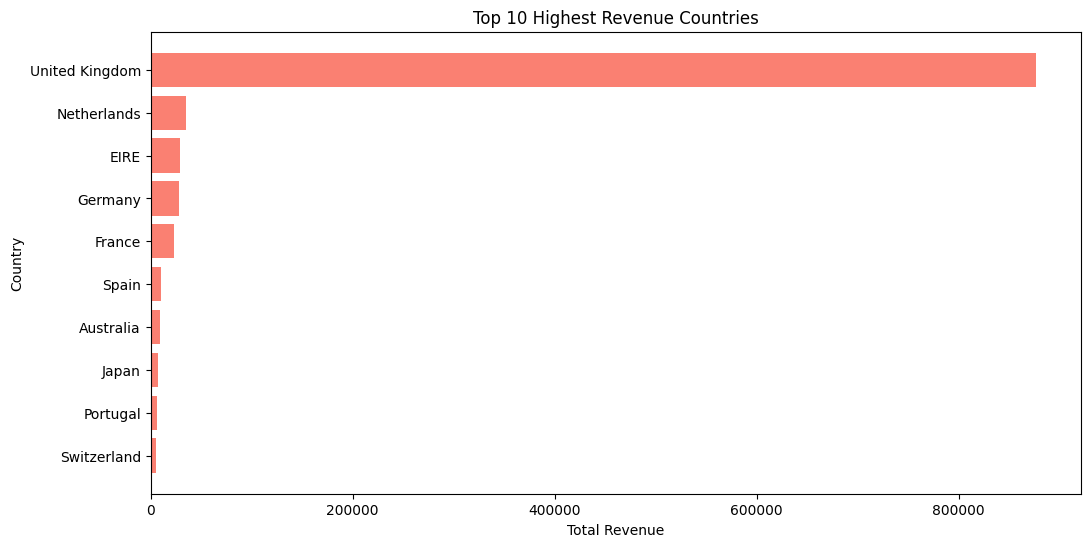

In [ ]:
 # Group by country and calculate total revenue
highest_revenue_countries = df3.groupby(['Country'])['Revenue'].sum().reset_index().sort_values(by=["Revenue"], ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the top N countries, change N to show more or fewer countries
N = 10
plt.barh(highest_revenue_countries['Country'][:N], highest_revenue_countries['Revenue'][:N], color='salmon')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest revenue country at the top
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.title('Top {} Highest Revenue Countries'.format(N))

plt.show()


In [ ]:
# Print total number of unique products
print("Total number of Products:\n" + str(df3["StockCode"].nunique()))

Total number of Products:
2598


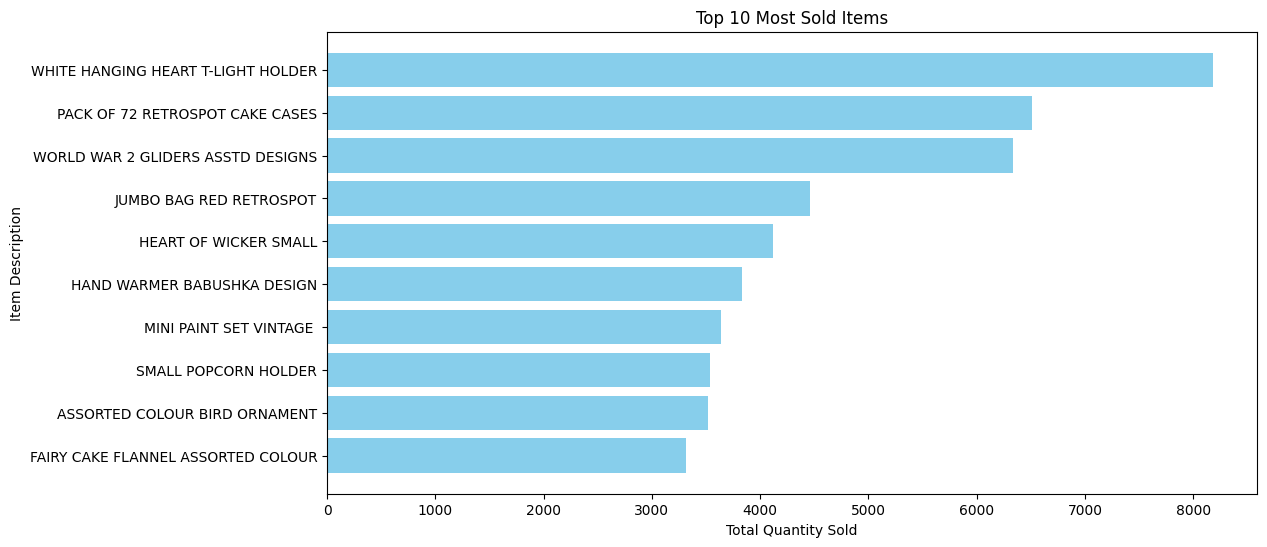

In [ ]:
# Group by item name and calculate total quantity sold
most_sold_items = df.groupby(['Description'])['Quantity'].sum().reset_index().sort_values(by=["Quantity"], ascending=False)



# Create a bar plot
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the top N items, change N to show more or fewer items
N = 10
plt.barh(most_sold_items['Description'][:N], most_sold_items['Quantity'][:N], color='skyblue')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most sold item at the top
plt.xlabel('Total Quantity Sold')
plt.ylabel('Item Description')
plt.title('Top {} Most Sold Items'.format(N))

plt.show()


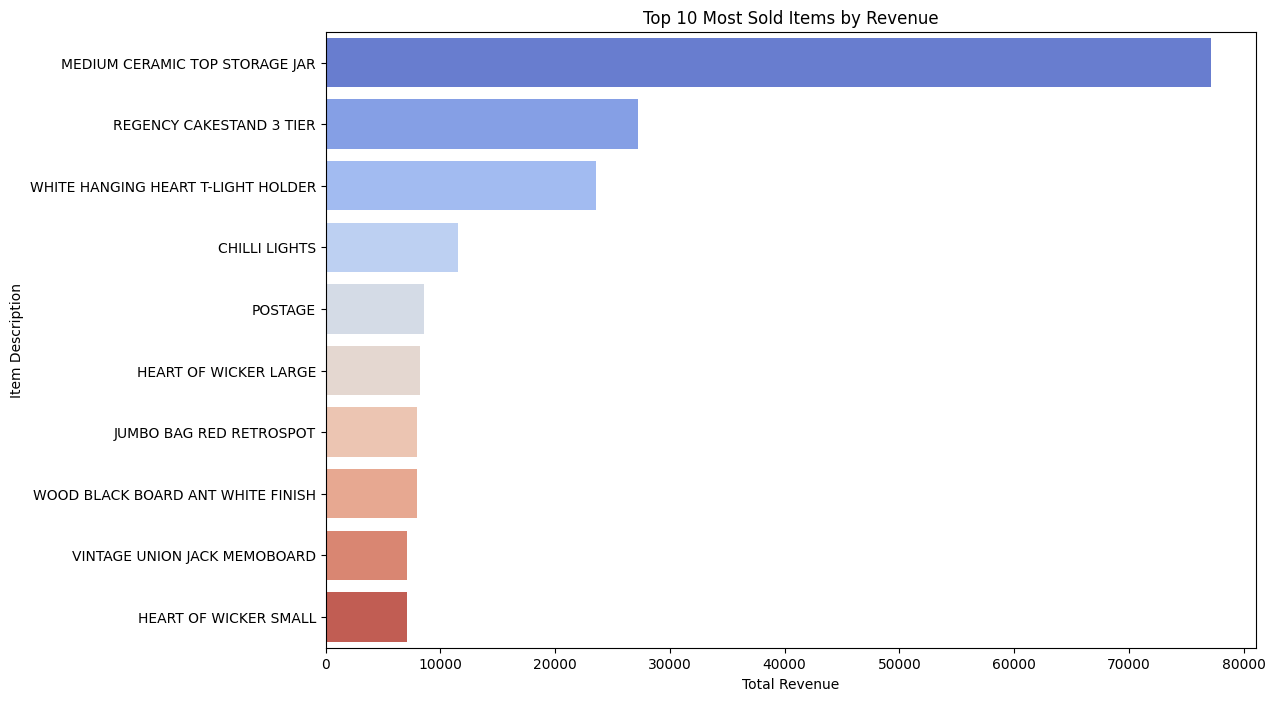

In [ ]:
# Group by item name and calculate total revenue
most_sold_items = df3.groupby(['Description'])['Revenue'].sum().reset_index().sort_values(by=["Revenue"], ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))  # Set the figure size

# Plot the top N items, change N to show more or fewer items
N = 10
sns.barplot(x='Revenue', y='Description', data=most_sold_items.head(N), palette='coolwarm')
plt.xlabel('Total Revenue')
plt.ylabel('Item Description')
plt.title('Top {} Most Sold Items by Revenue'.format(N))

plt.show()


<ipython-input-37-c2aa41263204>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['InvoiceDate'] = pd.to_datetime(df3['InvoiceDate'])


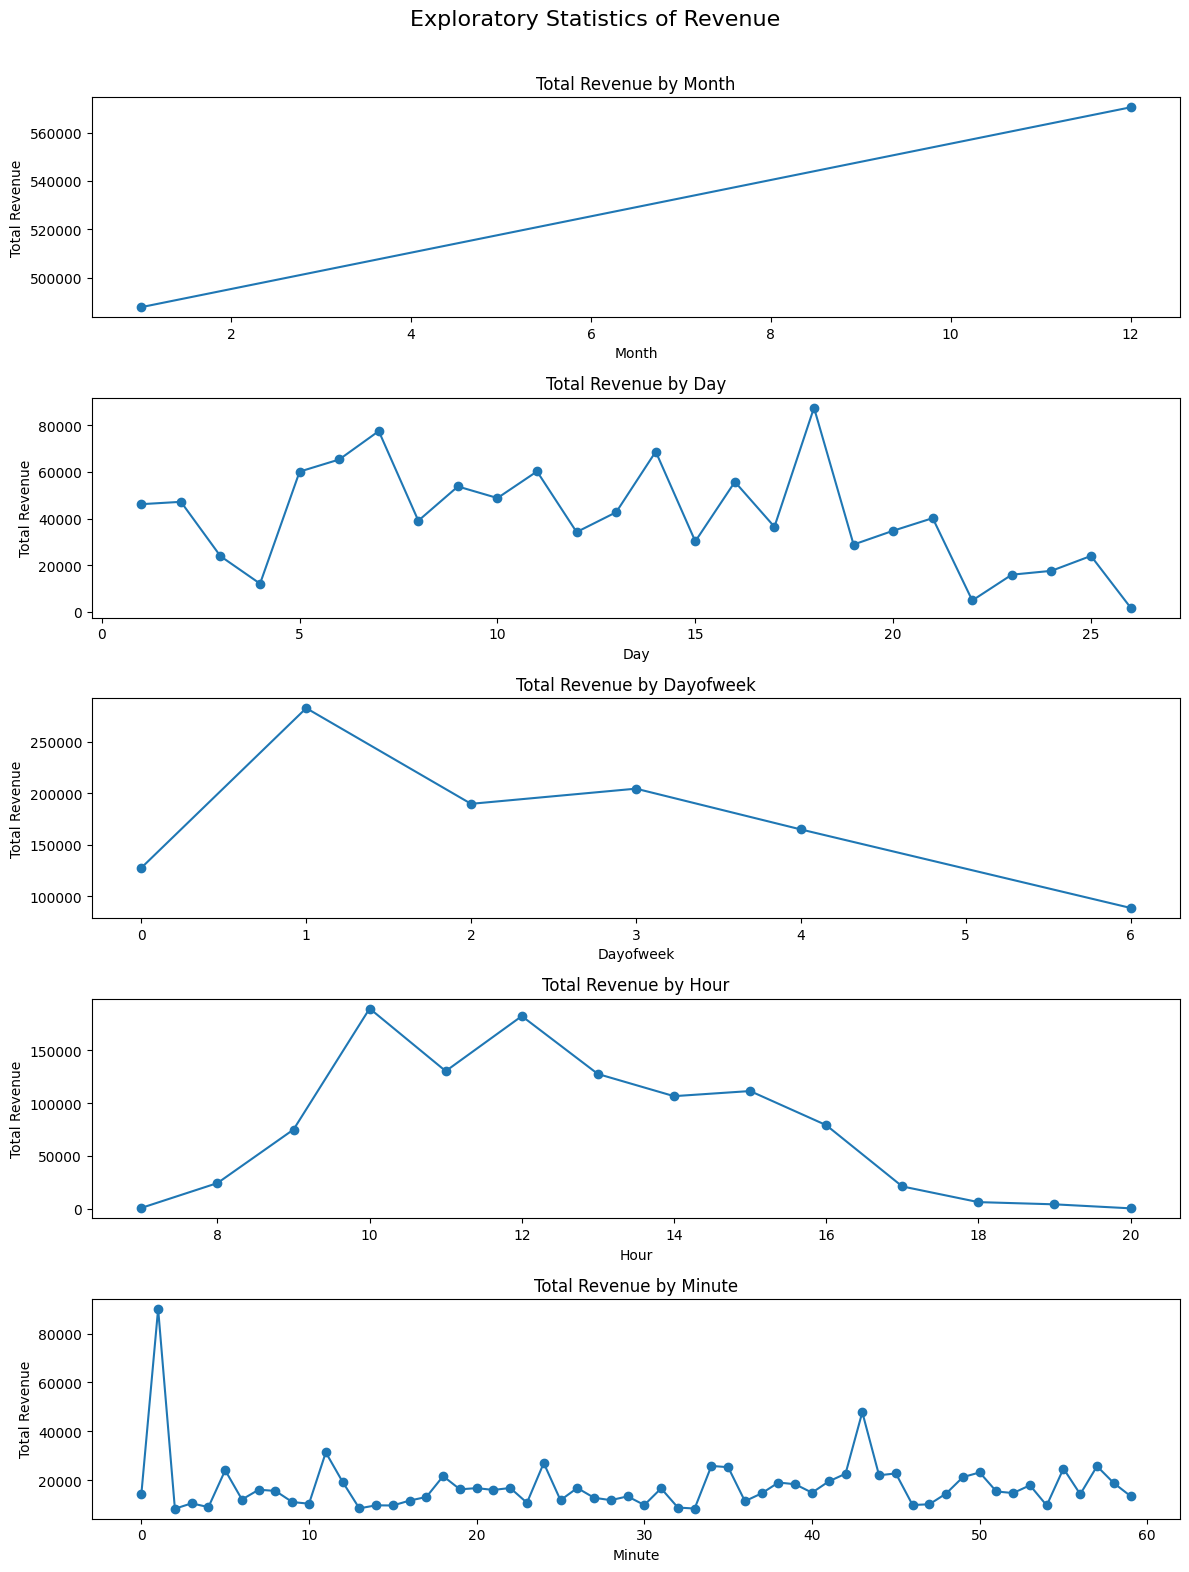

In [ ]:
# Define the exploratory columns
exploratory_columns = ['month', 'day', 'dayofweek', 'hour', 'minute']

# Convert 'InvoiceDate' to datetime if not already
df3['InvoiceDate'] = pd.to_datetime(df3['InvoiceDate'])

# Create subplots for each exploratory column
fig, axes = plt.subplots(nrows=len(exploratory_columns), figsize=(12, 16))

# Set a common title for all subplots
fig.suptitle('Exploratory Statistics of Revenue', fontsize=16)

for i, column in enumerate(exploratory_columns):
    temp = df3.groupby(df3['InvoiceDate'].dt.__getattribute__(column))['Revenue'].sum()
    ax = axes[i]
    ax.plot(temp.index, temp.values, marker='o', linestyle='-')
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Total Revenue')
    ax.set_title(f'Total Revenue by {column.capitalize()}')

# Adjust layout spacing
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the plots
plt.show()


In [ ]:
# Print total number of unique clients
print("Total number of clients:\n" + str(df3["CustomerID"].nunique()))

Total number of clients:
1218


**we will create a whole new data frame for creating insights on customerID**

In [ ]:

# Group by customer and calculate total quantity and revenue
customer_summary = df3.groupby(['CustomerID'])[['Quantity', 'Revenue']].sum().reset_index()

# Sort customers by quantity and revenue
sorted_by_quantity = customer_summary.sort_values(by=["Quantity"], ascending=False)
sorted_by_revenue = customer_summary.sort_values(by=["Revenue"], ascending=False)

# Select top customers by quantity and revenue
top_customers_by_quantity = sorted_by_quantity.head(10)
top_customers_by_revenue = sorted_by_revenue.head(10)

# Create separate DataFrames to store details
top_customers_quantity_df = top_customers_by_quantity.copy()
top_customers_revenue_df = top_customers_by_revenue.copy()



#Making a new data frame so it would be easy for matplotlib to visualize the data otherwise library have issues in visualizing the data.




# Combine the top customers by quantity and revenue DataFrames
DF_customer = pd.concat([top_customers_by_quantity[['CustomerID', 'Quantity', 'Revenue']],
                         top_customers_by_revenue[['CustomerID', 'Quantity', 'Revenue']]])

# Calculate the Sum_Column as the sum of Quantity and Revenue
DF_customer['Sum_Column'] = DF_customer['Quantity'] + DF_customer['Revenue']


# Reset the index and drop the old index
DF_customer.reset_index(drop=True, inplace=True)


# Display the DF_customer DataFrame
DF_customer



,CustomerID,Quantity,Revenue,Sum_Column
0,12346,74215,77183.60,151398.60
1,14646,27014,35068.56,62082.56
2,15061,10959,22668.91,33627.91
3,15749,9014,22998.40,32012.40
4,16029,8985,15251.91,24236.91
5,17511,8340,10573.22,18913.22
6,14156,7746,17096.92,24842.92
7,14298,7552,7464.56,15016.56
8,17450,6840,20649.04,27489.04
9,13694,6708,5507.92,12215.92


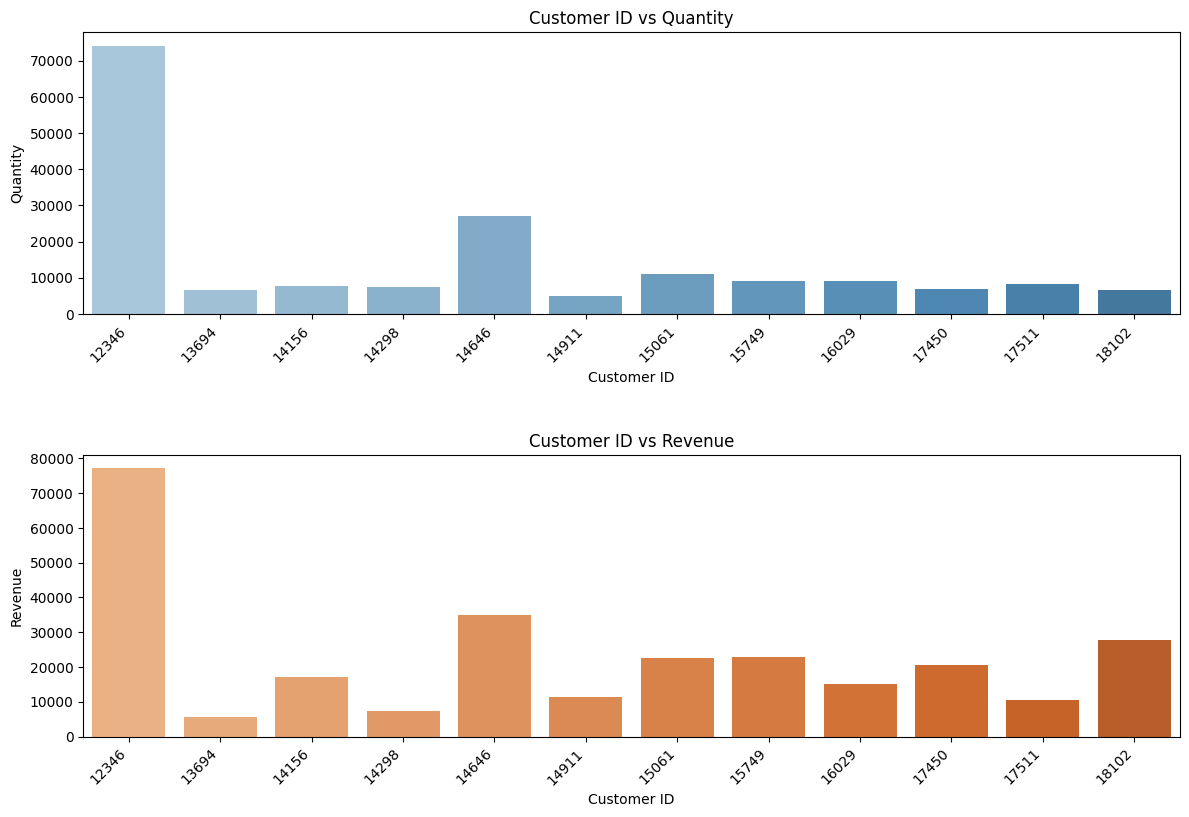

In [ ]:

# Set custom color palettes for the bar plots
quantity_palette = sns.color_palette("Blues_d", len(DF_customer))
revenue_palette = sns.color_palette("Oranges_d", len(DF_customer))

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# Bar plot for CustomerID vs Quantity
sns.barplot(data=DF_customer, x='CustomerID', y='Quantity', ax=ax1, palette=quantity_palette)
ax1.set_xlabel('Customer ID')
ax1.set_ylabel('Quantity')
ax1.set_title('Customer ID vs Quantity')

# Bar plot for CustomerID vs Revenue
sns.barplot(data=DF_customer, x='CustomerID', y='Revenue', ax=ax2, palette=revenue_palette)
ax2.set_xlabel('Customer ID')
ax2.set_ylabel('Revenue')
ax2.set_title('Customer ID vs Revenue')

# Adjust layout spacing and add space between subplots
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

# Rotate x-axis labels for better readability
for ax in [ax1, ax2]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Show the plots
plt.show()


In [ ]:
# Display the total number of unique invoice numbers
print("Total number of Orders:\n" + str(df3["InvoiceNo"].nunique()))

Total number of Orders:
2172


## **Number of Orders**

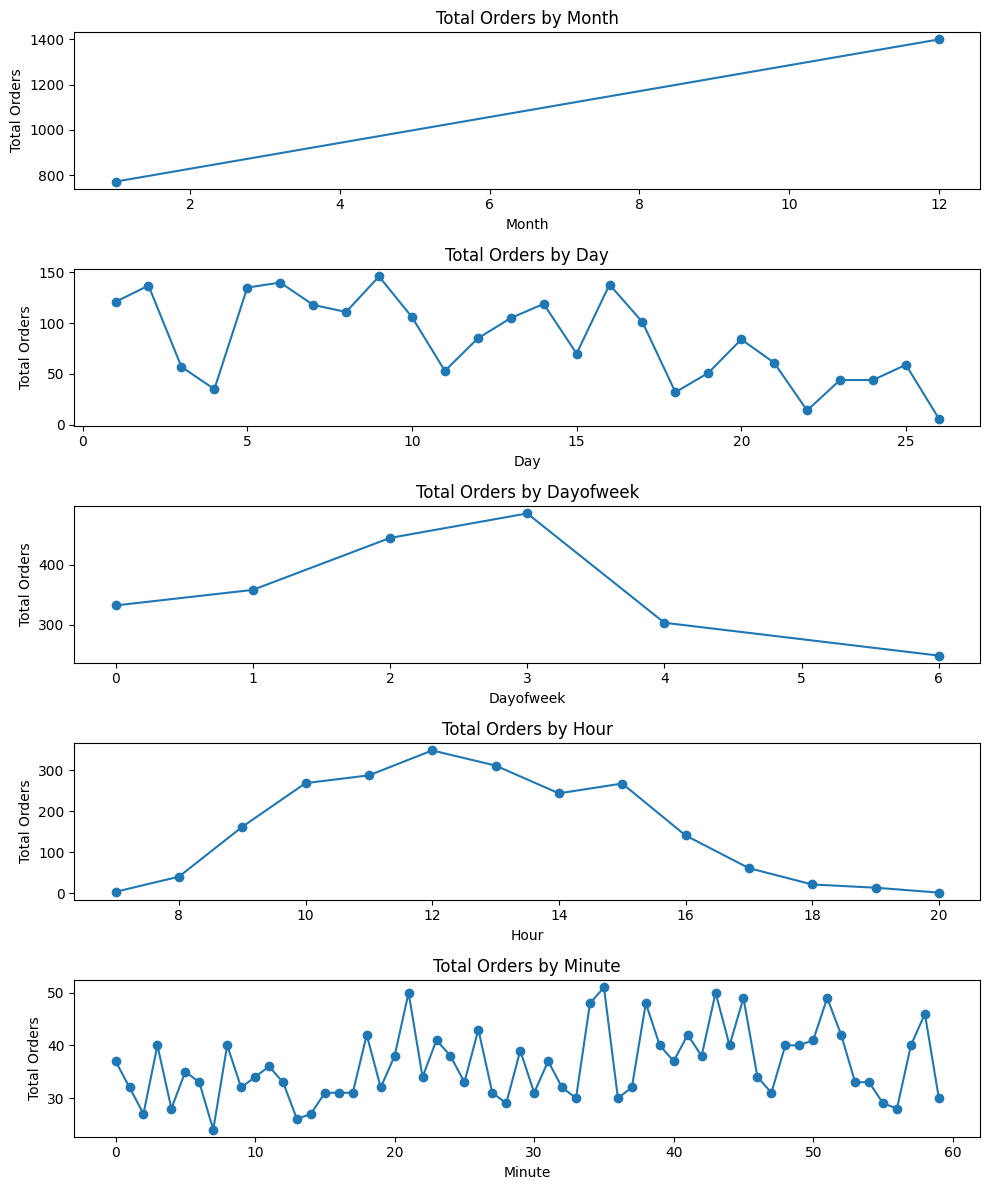

In [ ]:

# List of exploratory columns
exploratory_columns = ['month', 'day', 'dayofweek', 'hour', 'minute']

# Create subplots for each exploratory column
fig, axes = plt.subplots(nrows=len(exploratory_columns), ncols=1, figsize=(10, 12))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(exploratory_columns):
    # Group data by the selected column and count unique InvoiceNo
    temp = df3.groupby(df3['InvoiceDate'].dt.__getattribute__(column))['InvoiceNo'].nunique()

    # Plot the data
    axes[i].plot(temp.index, temp.values, marker='o', linestyle='-')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Total Orders')
    axes[i].set_title(f'Total Orders by {column.capitalize()}')

# Adjust layout spacing
plt.tight_layout()

# Show the plots
plt.show()


10 potential key results based on the data exploration:

1.  **Dataset Size and Quality:** The initial dataset contained over 540,000 transactions with 8 attributes. Significant data cleaning was performed, including handling missing values (especially in 'Description' and 'CustomerID'), removing duplicate rows, and dropping entries with zero 'UnitPrice' and canceled orders, resulting in a refined dataset for analysis.
2.  **Temporal Coverage:** The dataset covers transactions spanning approximately one year, from 2010-12-01 to 2011-12-09, providing a good period for analyzing trends.
3.  **Geographic Diversity:** The dataset includes transactions from 38 different countries, highlighting the international nature of the retail business.
4.  **Dominance of the United Kingdom:** The United Kingdom accounts for the overwhelming majority of orders and generates the highest total revenue by a significant margin, indicating it is the core market.
5.  **Top Performing Products by Quantity:** Identification of the top 10 most sold items by quantity provides insights into popular products and inventory management opportunities.
6.  **Top Performing Products by Revenue:** Identifying the top 10 items generating the highest revenue highlights high-value products that contribute most to the business's profitability.
7.  **Seasonal/Temporal Revenue Trends:** Analysis of revenue by month, day, day of the week, and hour reveals potential peak sales periods and patterns, informing marketing and staffing strategies.
8.  **Daily/Temporal Order Trends:** Analysis of the number of orders by month, day, day of the week, and hour shows when customers are most actively placing orders.
9.  **Customer Base Size:** The dataset includes a substantial number of unique customers (over 4000), indicating a diverse customer base.
10. **Top Customers by Engagement and Value:** Identification of the top customers based on both the total quantity of items purchased and the total revenue generated provides insights into high-value customers who could be targeted for loyalty programs or special offers.